In [1]:
from f_data_prep import *
from f_drosophila_infer import *

In [2]:
# x, w_train, sigma_train, bias_train = simulate4(20, 1000, coupling=0.1)
# w, sigma, bias = infer4(x)

In [3]:
# plt.figure(figsize=(5,5))
# plt.rcParams.update({'font.size':16})
# plt.scatter(w_train, w)
# plt.plot(w_train, w_train, 'r')
# plt.xlabel('w_train')
# plt.ylabel('w')

# plt.figure(figsize=(5,5))
# plt.scatter(sigma_train, sigma)
# plt.plot(np.linspace(np.min(sigma_train), np.max(sigma_train)), np.linspace(np.min(sigma_train), np.max(sigma_train)), 'r')
# plt.xlabel('sigma_train')
# plt.ylabel('sigma')
# # plt.plot(sigma_train, sigma_train, 'ro')

# plt.figure(figsize=(5,5))
# plt.scatter(bias_train, bias)
# plt.plot(bias_train, bias_train, 'ro')
# plt.xlabel('bias_train')
# plt.ylabel('bias')
# plt.show()

### modified infer4
argument includes y (= diff)

In [4]:
data_complete = np.loadtxt('../data_complete.txt')
data_bin = np.vsplit(data_complete, 6)
data_init = np.vstack([data_bin[i] for i in range(5)])
data_diff = make_data_diff(data_complete, 6)
data_diff_sum_sq = np.sum(np.abs(data_diff)**2, axis=0)

In [5]:
print(np.min(data_diff), np.max(data_diff))

-2.14384 2.22453


In [6]:
print(data_init.shape)
print(data_bin[0].shape)
print(data_diff.shape)

(30390, 99)
(6078, 99)
(30390, 99)


### Infer w using data_init and data_diff, linear

In [7]:
# w, sigma, bias =infer_drosophila(data_init, data_diff, max_iter=1000, power=0)
# with open('./pickles/w_linear.pkl', 'wb') as f:
#     pickle.dump(w, f)
# with open('./pickles/sigma_linear.pkl', 'wb') as f:
#     pickle.dump(sigma, f)
# with open('./pickles/bias_linear.pkl', 'wb') as f:
#     pickle.dump(bias, f)

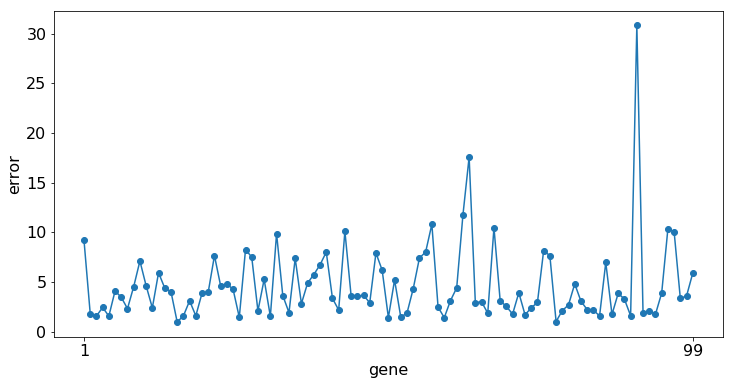

In [8]:
with open('./pickles/w_linear.pkl', 'rb') as f:
    w = pickle.load(f)
with open('./pickles/sigma_linear.pkl', 'rb') as f:
    sigma = pickle.load(f)
with open('./pickles/bias_linear.pkl', 'rb') as f:
    bias = pickle.load(f)
    
diff_pred = bias + data_init.dot(w) + sigma*npr.normal(size=(1,99))
error = np.sqrt(np.sum(np.abs(data_diff - diff_pred)**2, axis=0)/data_diff_sum_sq)
# divide the absolute difference by the sum diff of that gene in that cell across the time points
error_all = error
# print(error)
plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size':16})
plt.plot(range(99), error_all, 'o-')
plt.xticks([0,98], ['1','99'])
# plt.yticks([0, 2], ['0', '2'])
plt.xlabel('gene')
plt.ylabel('error')
plt.show()

### Infer w using data_init and data_diff, tanh

In [9]:
# w, sigma, bias =infer_drosophila(data_init, data_diff, max_iter=1000, power=1)
# with open('./pickles/w_tanh.pkl', 'wb') as f:
#     pickle.dump(w, f)
# f.close()
# with open('./pickles/sigma_tanh.pkl', 'wb') as f:
#     pickle.dump(sigma, f)
# f.close()
# with open('./pickles/bias_tanh.pkl', 'wb') as f:
#     pickle.dump(bias, f)

### predict data_diff with tanh and calculate error

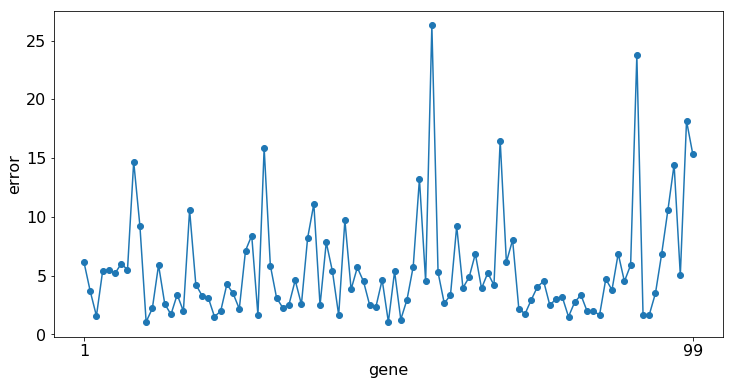

In [10]:
# data_complete = np.loadtxt('../data_complete.txt')
with open('./pickles/w_tanh.pkl', 'rb') as f:
    w = pickle.load(f)
with open('./pickles/sigma_tanh.pkl', 'rb') as f:
    sigma = pickle.load(f)
with open('./pickles/bias_tanh.pkl', 'rb') as f:
    bias = pickle.load(f)
    
diff_pred = np.tanh(bias + data_init.dot(w)) + sigma*npr.normal(size=(1,99))
error_tanh = np.sqrt(np.sum(np.abs(data_diff - diff_pred)**2, axis=0)/data_diff_sum_sq)

plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size':16})
plt.plot(range(99), error_tanh, 'o-')
# plt.plot(range(99), error_test, 'o-')
plt.xticks([0,98], ['1','99'])
# plt.yticks([0, 2], ['0', '2'])
plt.xlabel('gene')
plt.ylabel('error')
plt.show()

# plt.figure(figsize=(12,6))
# plt.rcParams.update({'font.size':16})
# plt.plot(range(99), error_test, 'o-')
# plt.xticks([0,98], ['1','99'])
# # plt.yticks([0, 2], ['0', '2'])
# plt.xlabel('gene')
# plt.ylabel('error_avg')
# plt.show()

# error_rms = np.sqrt(np.mean(error_all**2))
# print(error_rms)
# print(np.argsort(error_all)[::-1][:10])

# complete_all = ([int(x) - 1 for x in open('../indices_complete.txt','r').readline().split()])
# comp_ind = list(map(int, list((np.array(complete_all)[::6]-3)/6)))
# print(np.array(comp_ind))
# np.intersect1d(np.argsort(error_all)[::-1][:27], np.array(comp_ind))[:,None].shape

In [11]:
# w, sigma, bias =infer_drosophila(data_init, data_diff, max_iter=1000, power=3)
# with open('./pickles/w_p3.pkl', 'wb') as f:
#     pickle.dump(w, f)
# f.close()
# with open('./pickles/sigma_p3.pkl', 'wb') as f:
#     pickle.dump(sigma, f)
# f.close()
# with open('./pickles/bias_p3.pkl', 'wb') as f:
#     pickle.dump(bias, f)

### predict data_diff with power=3, and calculate error

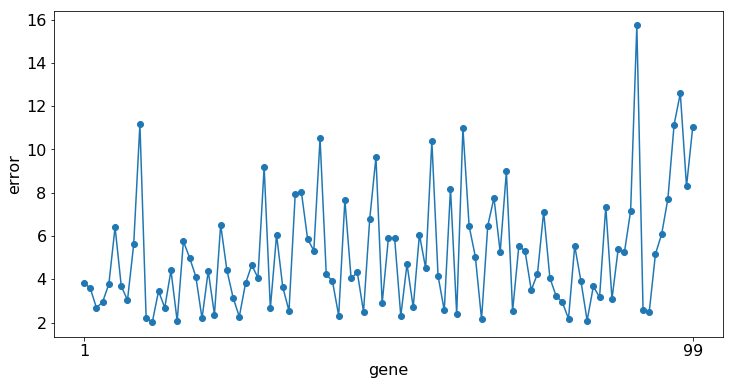

In [12]:
with open('./pickles/w_p3.pkl', 'rb') as f:
    w = pickle.load(f)
with open('./pickles/sigma_p3.pkl', 'rb') as f:
    sigma = pickle.load(f)
with open('./pickles/bias_p3.pkl', 'rb') as f:
    bias = pickle.load(f)
    
diff_pred = odd_power(bias + data_init.dot(w), 3) + sigma*npr.normal(size=(1,99))
error_p3 = np.sqrt(np.sum(np.abs(data_diff - diff_pred)**2, axis=0)/data_diff_sum_sq)

plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size':16})
plt.plot(range(99), error_p3, 'o-')
# plt.plot(range(99), error_test, 'o-')
plt.xticks([0,98], ['1','99'])
# plt.yticks([0, 2], ['0', '2'])
plt.xlabel('gene')
plt.ylabel('error')
plt.show()

In [13]:
# w, sigma, bias =infer_drosophila(data_init, data_diff, max_iter=1000, power=5)
# with open('./pickles/w_p5.pkl', 'wb') as f:
#     pickle.dump(w, f)
# f.close()
# with open('./pickles/sigma_p5.pkl', 'wb') as f:
#     pickle.dump(sigma, f)
# f.close()
# with open('./pickles/bias_p5.pkl', 'wb') as f:
#     pickle.dump(bias, f)

### predict data_diff with power=5 and calculate error

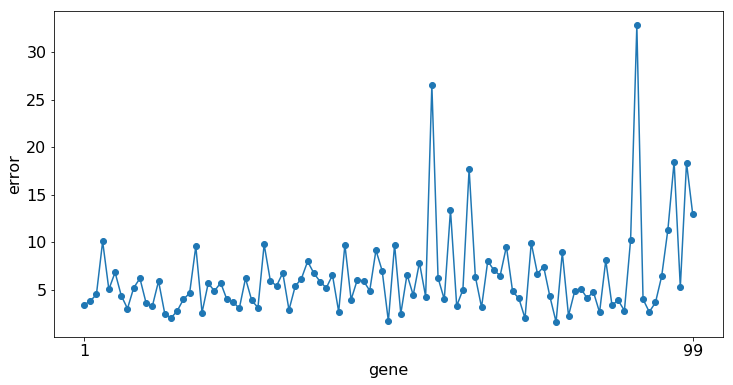

In [14]:
with open('./pickles/w_p5.pkl', 'rb') as f:
    w = pickle.load(f)
with open('./pickles/sigma_p5.pkl', 'rb') as f:
    sigma = pickle.load(f)
with open('./pickles/bias_p5.pkl', 'rb') as f:
    bias = pickle.load(f)
    
diff_pred = odd_power(bias + data_init.dot(w), 5) + sigma*npr.normal(size=(1,99))
error_p5 = np.sqrt(np.sum(np.abs(data_diff - diff_pred)**2, axis=0)/data_diff_sum_sq)

plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size':16})
plt.plot(range(99), error_p5, 'o-')
# plt.plot(range(99), error_test, 'o-')
plt.xticks([0,98], ['1','99'])
# plt.yticks([0, 2], ['0', '2'])
plt.xlabel('gene')
plt.ylabel('error')
plt.show()

In [15]:
# plt.figure(figsize=(12,6))
# # plt.plot(range(99), error_tanh, 'o-')
# # plt.plot(range(99), error_p3, 'o-')
# plt.plot(range(99), error_tanh - error_p3, 'ko-')
# plt.xticks([0,98], ['1','99'])
# plt.xlabel('genes')
# plt.ylabel('error')
# plt.show()

In [16]:
# sign_pred = np.sign(diff_pred)
# accuracy = [accuracy_score(np.sign(data_diff)[:,i], sign_pred[:,i], normalize=True) for i in range(99)]
# plt.figure(figsize=(12,6))
# plt.plot(range(99), accuracy, 'o-')
# plt.xlabel('gene')
# plt.ylabel('accuracy')
# plt.xticks([0,98], ['1','99'])
# plt.show()

# print(np.mean(accuracy))

In [17]:
data_complete = np.loadtxt('../data_complete.txt')
data_bin = np.vsplit(data_complete, 6)
data_diff = [data_bin[i+1]-data_bin[i] for i in range(5)]

### Infer w for 5 time points

In [18]:
# w_list=[]
# sigma_list=[]
# bias_list=[]
# for i in range(5):    
#     w, sigma, bias = infer_drosophila(data_bin[i], data_diff[i], max_iter=1000, power=1)
#     w_list.append(w)
#     sigma_list.append(sigma)
#     bias_list.append(bias)
    
# with open('./pickles/w_list_tanh.pkl', 'wb') as f:
#     pickle.dump(w_list, f)
# with open('./pickles/sigma_list_tanh.pkl', 'wb') as f:
#     pickle.dump(sigma_list, f)
# with open('./pickles/bias_list_tanh.pkl', 'wb') as f:
#     pickle.dump(bias_list, f)

### predict gene$_{i+1}$ - gene$_{i}$

In [19]:
data_bin = np.vsplit(data_complete, 6)
data_diff = [data_bin[i+1]-data_bin[i] for i in range(5)]

with open('./pickles/w_list_tanh.pkl', 'rb') as f:
    w_list = pickle.load(f)
with open('./pickles/sigma_list_tanh.pkl', 'rb') as f:
    sigma_list = pickle.load(f)
with open('./pickles/bias_list_tanh.pkl', 'rb') as f:
    bias_list = pickle.load(f)

diff_pred = [np.tanh(bias_list[i] + data_bin[i].dot(w_list[i])) + sigma_list[i]*npr.normal(size=(1,99)) for i in range(5)]
for i in range(5):
    error = np.sqrt(np.abs(np.sum(np.abs(data_diff[i] - diff_pred[i])**2, axis=0))\
                   /np.sum(np.abs(data_diff[i])**2, axis=0))
    plt.figure(figsize=(12,6))
    plt.plot(range(99), error, 'o-')
    plt.xticks([0,98], ['1', '99'])
    plt.xlabel('gene')
    plt.ylabel('error')

### predict gene$_{5}$ using gene$_{0}$, w$_{0}$, bias$_{0}$, and $\sigma_{0}$

In [20]:
init = np.copy(data_bin[0])
for i in range(5):
    diff = np.tanh(bias_list[0] + init.dot(w_list[0])) + sigma_list[0]*npr.normal(size=(1,99))
    init += diff

### calculate error between actual and predicted gene$_{5}$

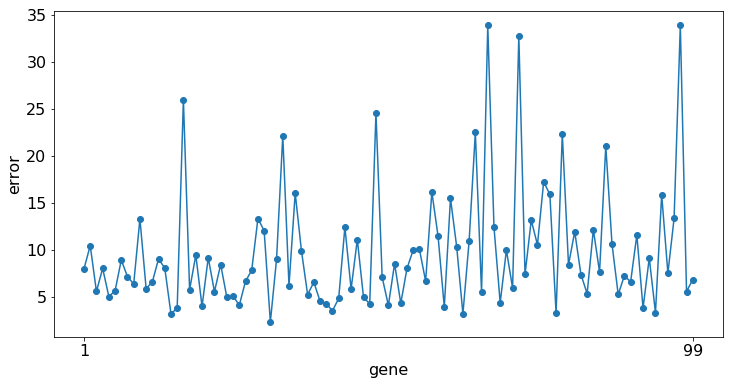

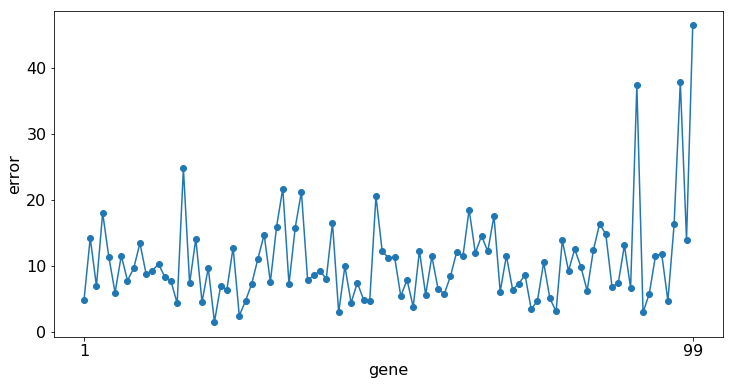

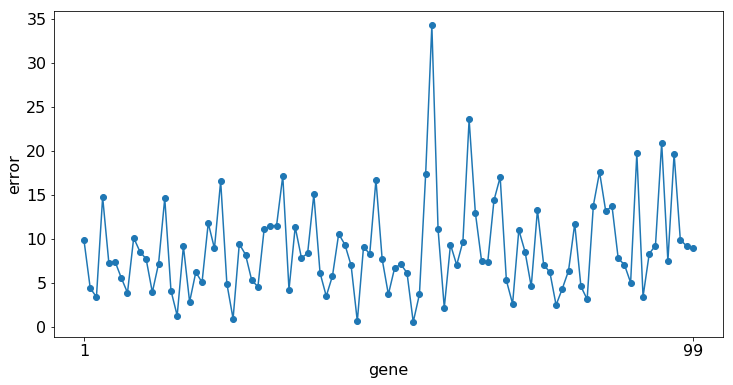

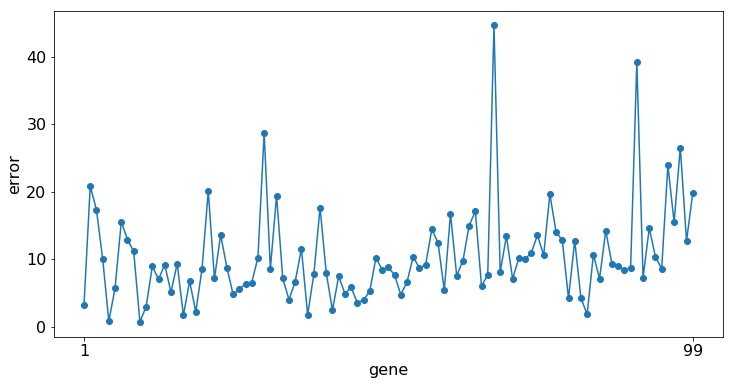

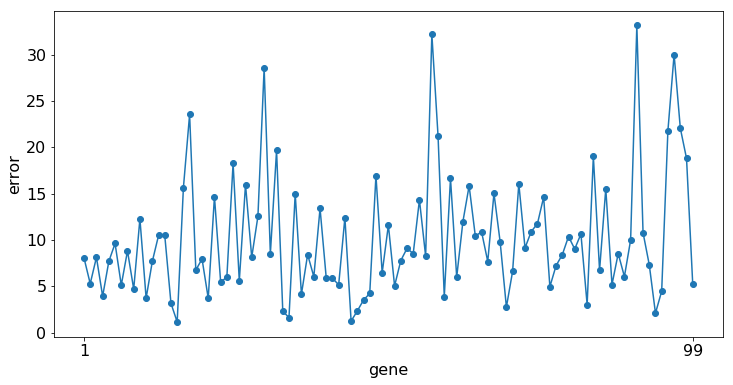

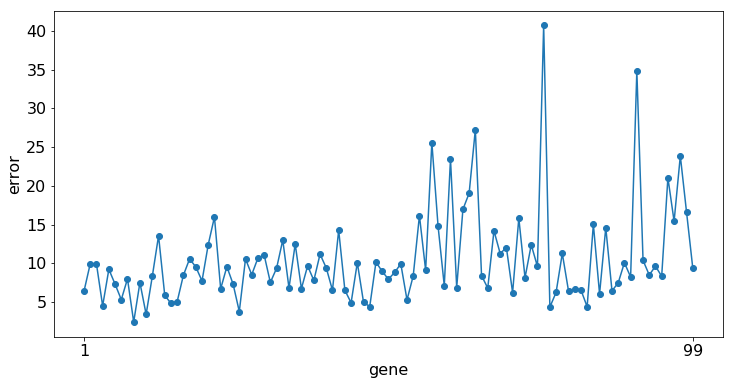

In [21]:
data_diff_sum_sq = np.sum(np.abs(data_diff[-1])**2, axis=0)
error = np.sqrt(np.sum(np.abs(data_diff[-1] - diff)**2, axis=0)/data_diff_sum_sq)

plt.figure(figsize=(12,6))
plt.plot(range(99), error, 'o-')
plt.xticks([0,98], ['1','99'])
plt.xlabel('gene')
plt.ylabel('error')
plt.show()
# for (i,j) in np.argwhere(data_bin[5] !=0):
#     error[i,j] = np.abs(data_bin[5][i,j] - pred[i,j])/data_bin[5][i,j]
    
# error[error==1000] = np.nan
# error_avg = np.nanmean(error, axis=0)

# # error = np.abs(data_bin[5] - pred)
# # error_avg = np.mean(error, axis=0)

# plt.figure(figsize=(12,6))
# plt.plot(range(99), error_avg, 'o-')
# plt.show()
# error_rms = np.sqrt(np.mean(error**2))
# print(error_rms)
# print(np.argsort(error_0)[::-1])
